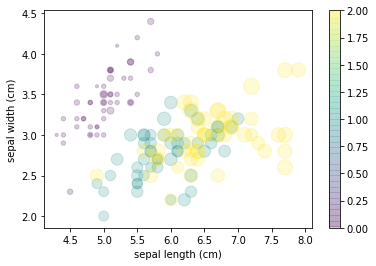

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar();

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(iris.DESCR[:100])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Num


In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### K-Neighbors Classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #cross_validation module is deprecated
Xtrain, Xtest, ytrain, ytest = train_test_split(iris['data'],iris['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(Xtrain, ytrain)
y_predict = knn.predict(Xtest)
print(knn.score(Xtrain, ytrain))
print(knn.score(Xtest, ytest))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_predict))

1.0
0.9736842105263158
0.9736842105263158


In [7]:

knn.classes_, knn.effective_metric_, knn.outputs_2d_

(array([0, 1, 2]), 'euclidean', False)

In [8]:
print(list(zip(ytest,y_predict)))

[(2, 2), (1, 1), (0, 0), (2, 2), (0, 0), (2, 2), (0, 0), (1, 1), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (2, 2), (1, 1), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (2, 2), (1, 1), (0, 0), (2, 2), (2, 2), (1, 1), (0, 0), (1, 2)]


In [9]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
prediction

array([0])

In [10]:
iris['target_names'][prediction]

array(['setosa'], dtype='<U10')

### Clustering - Gaussian Mixture

In [11]:
# a complete example of unsupervised learning: Iris clustering

from sklearn.mixture import GaussianMixture      # 1. Choose the model class. GMM module is deprecated
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

NameError: name 'X_iris' is not defined

In [70]:
print(model.converged_),
print(model.covariances_)

True
[[[ 0.121765    0.097232    0.016028    0.010124  ]
  [ 0.097232    0.140817    0.011464    0.009112  ]
  [ 0.016028    0.011464    0.029557    0.005948  ]
  [ 0.010124    0.009112    0.005948    0.010885  ]]

 [[ 0.2755171   0.09662295  0.18547072  0.05478901]
  [ 0.09662295  0.09255152  0.09103431  0.04299899]
  [ 0.18547072  0.09103431  0.20235849  0.06171383]
  [ 0.05478901  0.04299899  0.06171383  0.03233775]]

 [[ 0.38744093  0.09223276  0.30244302  0.06087397]
  [ 0.09223276  0.11040914  0.08385112  0.05574334]
  [ 0.30244302  0.08385112  0.32589574  0.07276776]
  [ 0.06087397  0.05574334  0.07276776  0.08484505]]]


#### Another Example of GMM Clustering

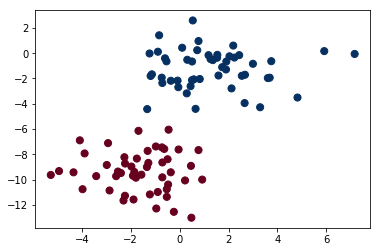

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');


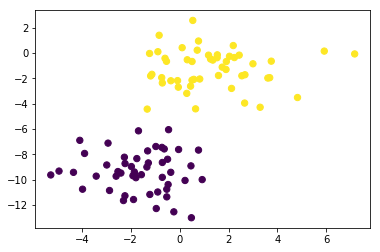

In [13]:
gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [14]:
probs = gmm.predict_proba(X)
print(probs.shape)
probs[:6].round(3)

(100, 2)


array([[1.   , 0.   ],
       [1.   , 0.   ],
       [0.963, 0.037],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ]])